<a href="https://colab.research.google.com/github/HiralJain112/Python_notebooks/blob/main/random_Forest_and_Decision_Tree_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('/content/loan_data.csv')

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


##**EDA**

Text(0, 0.5, '')

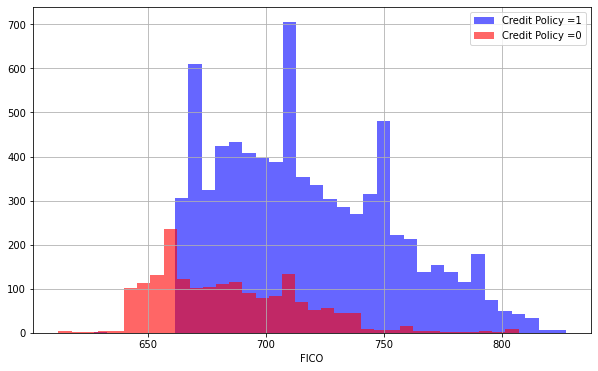

In [7]:
plt.figure(figsize =(10,6))
df[df['credit.policy']==1]['fico'].hist(bins =35, color='blue', label='Credit Policy =1',alpha = 0.6)
df[df['credit.policy']==0]['fico'].hist(bins =35, color='red', label='Credit Policy =0',alpha = 0.6)
plt.legend()
plt.xlabel('FICO')
plt.ylabel('')

Text(0, 0.5, '')

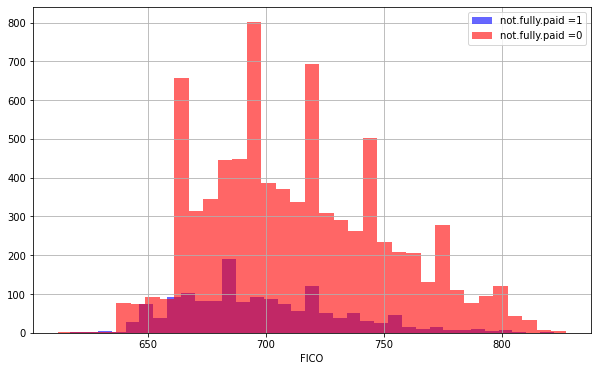

In [8]:
plt.figure(figsize =(10,6))
df[df['not.fully.paid']==1]['fico'].hist(bins =35, color='blue', label='not.fully.paid =1',alpha = 0.6)
df[df['not.fully.paid']==0]['fico'].hist(bins =35, color='red', label='not.fully.paid =0',alpha = 0.6)
plt.legend()
plt.xlabel('FICO')
plt.ylabel('')

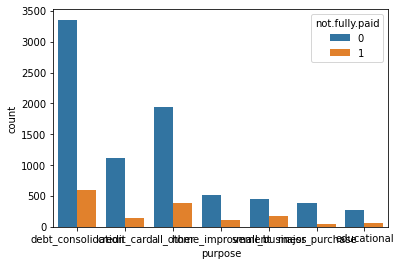

In [9]:
sns.countplot(x ='purpose',hue ='not.fully.paid', data = df)

##FICO score vs Interest rate

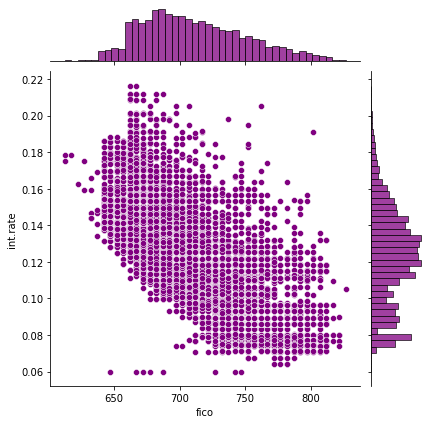

In [10]:
sns.jointplot(x = 'fico', y='int.rate',data =df,color ='purple')

<Figure size 792x504 with 0 Axes>

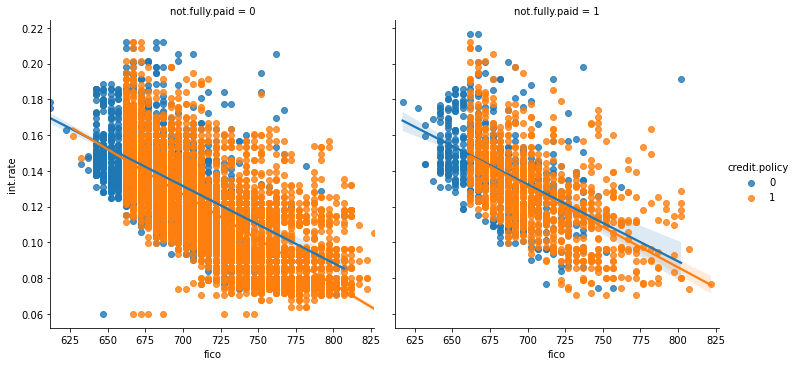

In [13]:
plt.figure(figsize=(11,7))
sns.lmplot(x='fico',y='int.rate',data =df,hue ='credit.policy',col='not.fully.paid')

##Categorical features

In [14]:
cat_feats = ['purpose']

In [16]:
final_data = pd.get_dummies(df,columns = cat_feats,drop_first =True)

In [17]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

##Train test split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = final_data.drop('not.fully.paid', axis =1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

##Training a decision tree model

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dtree = DecisionTreeClassifier()

In [22]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
y_pred = dtree.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



[[2005  426]
 [ 340  103]]


##**Training the Random Forest Model**

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc = RandomForestClassifier(n_estimators = 300)

In [28]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

##Predictions and Evaluations

In [29]:
y_pred = rfc.predict(X_test)

In [30]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.59      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



[[2424    7]
 [ 433   10]]
